In [6]:
%load_ext autoreload
%autoreload 2
import torchvision
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader
import torch
from PIL import Image
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from training import datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/max/Documents/Studium/_Master_Thesis/venv/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


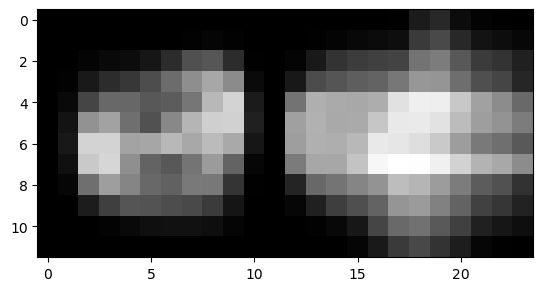

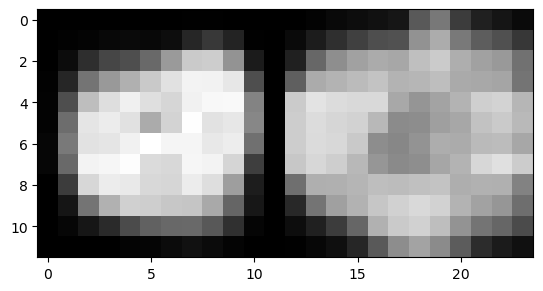

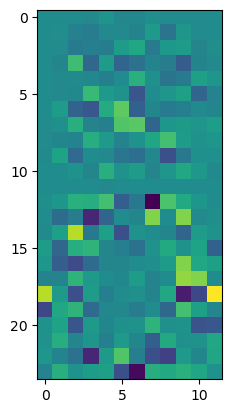

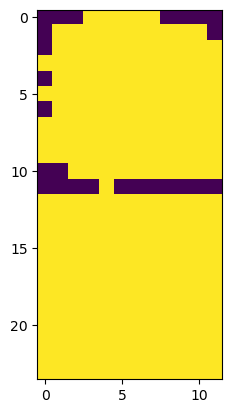

(<matplotlib.image.AxesImage at 0x1697e5cd0>, None)

In [30]:
from matplotlib.pyplot import sca


x,y,xx,yy = datasets.__make_minst_and_fashion_mnist(
    scaler=None,
    transforms=torchvision.transforms.Resize((12,12)),
    fashion_subset=(1,6,7),
    mnist_subset=(0,1,2),
    test_size=300,
    train_size=3000,
)

original_mean = x.mean(axis=0)  # Mean of original data
original_std = x.std(axis=0)    # Std of original data

x,y,xx,yy = datasets.__make_minst_and_fashion_mnist(
    scaler=datasets.Scalers.StandardUnitVariance.name,
    transforms=torchvision.transforms.Resize((12,12)),
    fashion_subset=(1,6,7),
    mnist_subset=(0,1,2),
    test_size=300,
    train_size=3000,
)
scaled_mean = x.mean(axis=0)  # Mean of scaled data, should be close to 0
scaled_std = x.std(axis=0)    # Std


plt.imshow(original_mean.view(24, 12).T, cmap='gray'), plt.show()
plt.imshow(original_std.view(24, 12).T, cmap='gray'), plt.show()

plt.imshow(scaled_mean.view(24, 12)), plt.show()
plt.imshow(scaled_std.view(24, 12)), plt.show()



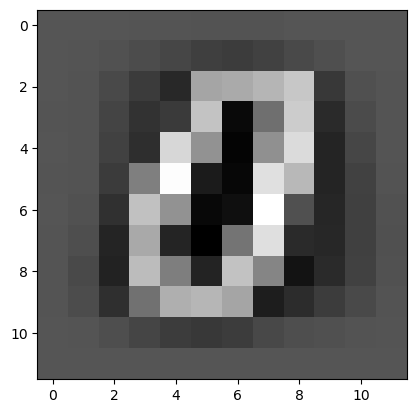

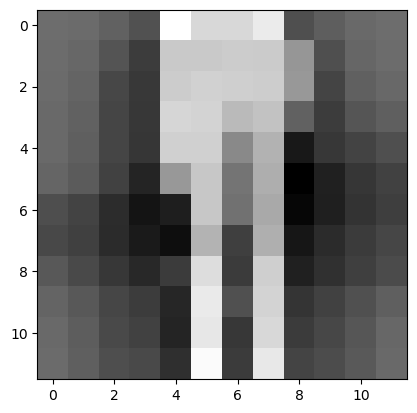

tensor([0., 0.])

In [19]:
# Use matplotlib to display the image
plt.imshow(x[0][:144].view(12, 12), cmap='gray'), plt.show()
plt.imshow(x[0][144:].view(12, 12), cmap='gray'), plt.show()
y[0]

In [ ]:
x,y,xx,yy = datasets.__make_fashion_mnist(
    scaler=datasets.Scalers.StandardUnitVariance.name,
    transforms=torchvision.transforms.Resize((12,12)),
    subset=(1,6,7)
    )

# subsample the dataset to have equal number of each class.
n = 3000
class_indices = [torch.where(y == i)[0] for i in y.unique()]
subset_indices = torch.cat([
    indices[torch.randperm(len(indices))[:n]] 
    for indices in class_indices
])

x = x[subset_indices]
y = y[subset_indices]
y.unique(return_counts=True)

In [ ]:
train = MNIST(
    root="mnist_data",
    train=True,
    download=True,
    transform=transform
)
test = MNIST(
    root="mnist_data",
    train=False,
    download=True,
    transform=transform
)
subset = [0,1,2]
if subset is not None:
    train_mask = torch.isin(train.targets, torch.tensor(subset))
    train.data = train.data[train_mask]
    train.targets = train.targets[train_mask]

    test_mask = torch.isin(test.targets, torch.tensor(subset))
    test.data = test.data[test_mask]
    test.targets = test.targets[test_mask]

test.targets.unique(return_counts=True)

In [ ]:
for i in range(10):
    image, label = train[i]  # Gets the first image and its label

    # Convert to PIL Image for display
    image = transforms.ToPILImage()(image.squeeze(0))

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

In [ ]:
test = FashionMNIST(
    root="fashion_mnist_data",
    train=False,
    download=True,
)
transforms = torchvision.transforms.Resize((12, 12))
#transforms = None
if transforms is not None:
    train.data = transforms(train.data)
    test.data = transforms(test.data)
subset = (1, 6, 7)
if subset is not None:
    train_mask = torch.isin(train.targets, torch.tensor(subset))
    train.data = train.data[train_mask]
    train.targets = train.targets[train_mask]

    test_mask = torch.isin(test.targets, torch.tensor(subset))
    test.data = test.data[test_mask]
    test.targets = test.targets[test_mask]

test.targets.unique()

In [ ]:
for i in range(10):
    image, label = test[i]  # Gets the first image and its label

    # Convert to PIL Image for display
    #image = torchvision.transforms.ToPILImage()(image.squeeze(0))

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()